In [1]:
import matplotlib.pyplot as plt
from time import time
from simfunctions import *

# SI Model

$$ S + I \to I + I, c_1x_Sx_I $$
$$ S \to I, c_2x_S $$
with parameters $c_1 = 0.008, c_2=0.1.$


In [2]:
def rate1(X):
    rate = X[0]*X[1]
    if rate > 0:
        return rate
    else:
        return 0

def rate2(X):
    rate = X[0]
    if rate > 0:
        return rate
    else:
        return 0

# Example usage:
drift = [rate1, rate2]
S_matrix = np.array([[-1, 1], [-1, 1]])  # Stoichiometry matrix
c = np.array([0.008, 0.1])  # Reaction rates
X0 = np.array([90, 10])  # Initial state
T = 5  # Total time

## Tau-Leaping

In [3]:
tau = 0.1  # Leap size

n_runs = 500
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_tau = tau_leaping(drift, S_matrix, c, X0, T, tau)
    runs.append(X)
    
print('Number of steps: ', len(X))

0.0 % simulations completed
10.0 % simulations completed
20.0 % simulations completed
30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed
Number of steps:  51


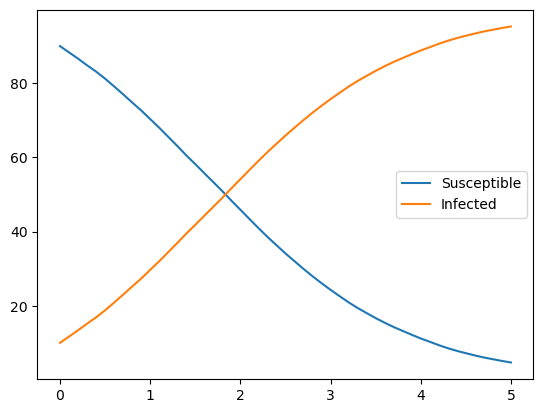

In [5]:
Xs = np.mean(np.array(runs)[:,:,0], axis=0)
Xi = np.mean(np.array(runs)[:,:,1], axis=0)

plt.plot(t_tau, Xs, label='Susceptible')
plt.plot(t_tau, Xi, label='Infected')
plt.legend()

## Mean-field

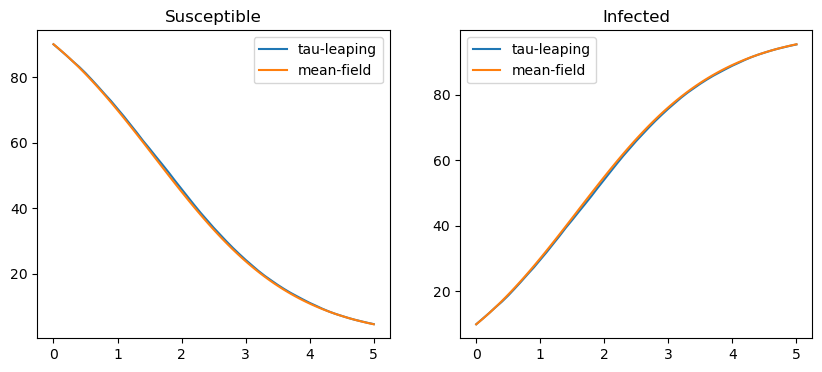

In [6]:
tmf = np.linspace(0,T, 100)
Xmf = mean_field(drift,S_matrix,c,X0,tmf)

fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].plot(t_tau, Xs, label='tau-leaping')
axs[0].plot(tmf, Xmf[:,0], label='mean-field')
axs[0].set_title('Susceptible')
axs[0].legend()

axs[1].plot(t_tau, Xi, label='tau-leaping')
axs[1].plot(tmf, Xmf[:,1], label='mean-field')
axs[1].set_title('Infected')
axs[1].legend()

## SOGA - Gaussian Approximation

In [1]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/SI5.soga')
cfg = produce_cfg(compiledFile)
start = time()
output_dist = start_SOGA(cfg)
end = time()

print('Computed in {}s'.format(np.round(end-start,3)))

it. [None] mean rate1 0.0 mean rate2 0.0 var rate1 0.0 var rate2 0.0
it. [1] mean rate1 0.72 mean rate2 0.9 var rate1 0.0 var rate2 0.0
it. [2] mean rate1 0.8202844561434142 mean rate2 0.8838000044087752 var rate1 0.0781810142189179 var rate2 0.012727906265270391
it. [3] mean rate1 0.921237436844522 mean rate2 0.8667591654472654 var rate1 0.10715551202259495 var rate2 0.01824924532303292
it. [4] mean rate1 1.0221622539076205 mean rate2 0.8488792098433193 var rate1 0.1265660793898886 var rate2 0.022649838865842216
it. [5] mean rate1 1.1222942497227382 mean rate2 0.8301688178469805 var rate1 0.1401688217863325 var rate2 0.026490951402037884
it. [6] mean rate1 1.2208088914452984 mean rate2 0.8106442356943708 var rate1 0.14937700971383816 var rate2 0.029984119116591535
it. [7] mean rate1 1.3168328086919372 mean rate2 0.7903298012023553 var rate1 0.15488650348844457 var rate2 0.03323410066947511
it. [8] mean rate1 1.4094577882796075 mean rate2 0.7692583533226831 var rate1 0.1570957624091642

C:\Users\birik\github\SOGA4SSA\src\libSOGAupdate.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = 1 - norm.cdf(-muprime/pois_sigma)
C:\Users\birik\github\SOGA4SSA\src\libSOGAupdate.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = muprime*pois_it[k_val-1] + pois_sigma*norm.pdf(-muprime/pois_sigma)


it. [11] mean rate1 1.6577042017488244 mean rate2 0.7019621531134265 var rate1 0.14620806751047305 var rate2 0.04470194057516895
it. [12] mean rate1 1.7275912107022717 mean rate2 0.6783665260922388 var rate1 0.13731478587119997 var rate2 0.04729144776809815
it. [13] mean rate1 1.7896789129861697 mean rate2 0.6543083459165078 var rate1 0.12608791776218162 var rate2 0.049790262674946816
it. [14] mean rate1 1.8432684342156076 mean rate2 0.6298702680759697 var rate1 0.11277056308263464 var rate2 0.05220305731396189
it. [15] mean rate1 1.8877721192442332 mean rate2 0.6051410847262888 var rate1 0.09771348047459014 var rate2 0.05453290196798841
it. [16] mean rate1 1.9227316498735956 mean rate2 0.5802145459276027 var rate1 0.08149507521107802 var rate2 0.05678177865679286
it. [17] mean rate1 1.9478325461187769 mean rate2 0.5551880157930759 var rate1 0.06523425663931208 var rate2 0.058950951205015215
it. [18] mean rate1 1.9629142501637897 mean rate2 0.5301610018634175 var rate1 0.05142744414092

In [9]:
t = len(t_tau)

xs = np.zeros(t)
xi = np.zeros(t)
stds = np.zeros(t)
stdi = np.zeros(t)

for i in range(t):
    idxs = output_dist.var_list.index('susceptible[{}]'.format(i))
    idxi = output_dist.var_list.index('infected[{}]'.format(i))
    xs[i] = output_dist.gm.mean()[idxs]
    stds[i] = np.sqrt(output_dist.gm.cov()[idxs,idxs])
    xi[i] = output_dist.gm.mean()[idxi]
    stdi[i] = np.sqrt(output_dist.gm.cov()[idxi,idxi])

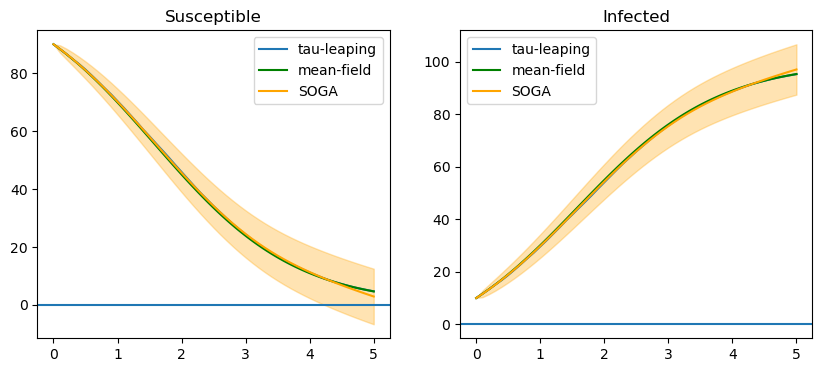

In [13]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].plot(t_tau, Xs, label='tau-leaping')
axs[0].plot(tmf, Xmf[:,0], label='mean-field', color='green')
axs[0].plot(t_tau, xs, label='SOGA', color='orange')
axs[0].fill_between(t_tau, xs-stds, xs+stds ,alpha=0.3, color='orange')
axs[0].set_title('Susceptible')
axs[0].axhline(0)
axs[0].legend()

axs[1].plot(t_tau, Xi, label='tau-leaping')
axs[1].plot(tmf, Xmf[:,1], label='mean-field', color='green')
axs[1].plot(t_tau, xi, label='SOGA', color='orange')
axs[1].fill_between(t_tau, xi-stdi, xi+stdi ,alpha=0.3, color='orange')
axs[1].set_title('Infected')
axs[1].axhline(0)
axs[1].legend()

## SOGA - Discrete Approximation

In [ ]:
# Tau-leaping
S_matrix = np.array([[-1, 1], [-1, 1]])  # Stoichiometry matrix
c = np.array([0.008, 0.1])  # Reaction rates
X0 = np.array([90, 10])  # Initial state
T = 0.5  # Total time
tau = 0.1  # Leap size

n_runs = 1000
runs = []

for _ in range(n_runs):
    X, t_tau = tau_leaping(drift, S_matrix, c, X0, T, tau)
    runs.append(X)
    
Xs = np.mean(np.array(runs)[:,:,0], axis=0)
Xi = np.mean(np.array(runs)[:,:,1], axis=0)
    
# SOGA

compiledFile=compile2SOGA('../programs/SOGA/SSA/SIdisc.soga')
cfg = produce_cfg(compiledFile)
start = time()
output_dist = start_SOGA(cfg, pruning='ranking')
end = time()

print('Computed in {}s'.format(np.round(end-start,3)))

t = len(t_tau)
xs = np.zeros(t)
xi = np.zeros(t)
stds = np.zeros(t)
stdi = np.zeros(t)

for i in range(t):
    idxs = output_dist.var_list.index('susceptible[{}]'.format(i))
    idxi = output_dist.var_list.index('infected[{}]'.format(i))
    xs[i] = output_dist.gm.mean()[idxs]
    stds[i] = np.sqrt(output_dist.gm.cov()[idxs,idxs])
    xi[i] = output_dist.gm.mean()[idxi]
    stdi[i] = np.sqrt(output_dist.gm.cov()[idxi,idxi])

In [ ]:
# Plot

fig, axs = plt.subplots(1,2, figsize=(10,4))

axs[0].plot(t_tau, Xs, label='tau-leaping')
axs[0].plot(t_tau, xs, label='SOGA', color='orange')
axs[0].fill_between(t_tau, xs-stds, xs+stds ,alpha=0.3, color='orange')
axs[0].set_title('Susceptible')
axs[0].legend()

axs[1].plot(t_tau, Xi, label='tau-leaping')
axs[1].plot(t_tau, xi, label='SOGA')
axs[1].fill_between(t_tau, xi-stdi, xi+stdi ,alpha=0.3, color='orange')
axs[1].set_title('Infected')
axs[1].legend()